# CARDIOVASCULAR REPORT PREDICTION AMONG ANIMALS

## OVERVIEW
In this report, we will explore the factors that contribute to cardiovascular disease in animals and develop a predictive model to estimate the risk of cardiovascular disease based on various factors.
Cardiovascular disease is a leading cause of death in both humans and animals. In animals, cardiovascular disease can be caused by a variety of factors, including genetics, lifestyle, and environmental factors.

## OBJECTIVES
- Tendering results of our analysis, including the performance of the predictive model and the factors that contribute to cardiovascular disease in animals.



In [114]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline


#from sklearn.linear_model import LogisticRegression
#from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.svm import SVC, LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam




# models
from sklearn.linear_model import LogisticRegression, Perceptron, RidgeClassifier, SGDClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, ExtraTreesClassifier
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier, VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import xgboost as xgb
from xgboost import XGBClassifier
import lightgbm as lgb
from lightgbm import LGBMClassifier



# NN models
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras import optimizers
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras import optimizers
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.callbacks import EarlyStopping, ModelCheckpoint

# model tuning
from hyperopt import STATUS_OK, Trials, fmin, hp, tpe, space_eval

# import warnings filter
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)

In [115]:
#Load the data
df = pd.read_csv('Files/Heart_data.csv')

In [116]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,NaN,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,NaN,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [117]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1592 entries, 0 to 1591
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1513 non-null   float64
 1   sex       1561 non-null   float64
 2   cp        1433 non-null   float64
 3   trestbps  1592 non-null   float64
 4   chol      1529 non-null   float64
 5   fbs       1513 non-null   float64
 6   restecg   1585 non-null   float64
 7   thalach   1592 non-null   float64
 8   exang     1545 non-null   float64
 9   oldpeak   1561 non-null   float64
 10  slope     1538 non-null   float64
 11  ca        1592 non-null   float64
 12  thal      1585 non-null   float64
 13  target    1592 non-null   int64  
dtypes: float64(13), int64(1)
memory usage: 174.3 KB


# **EDA**

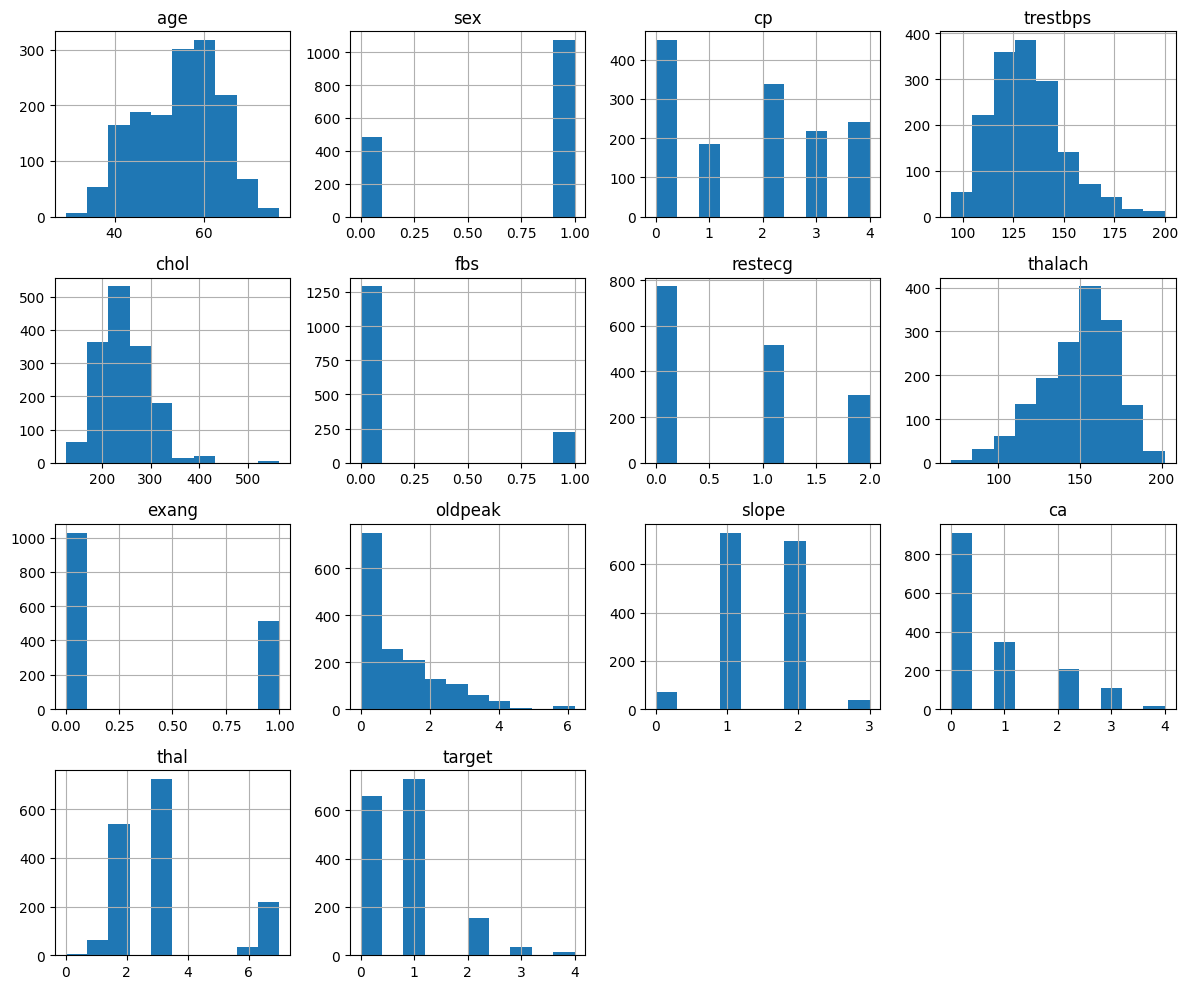

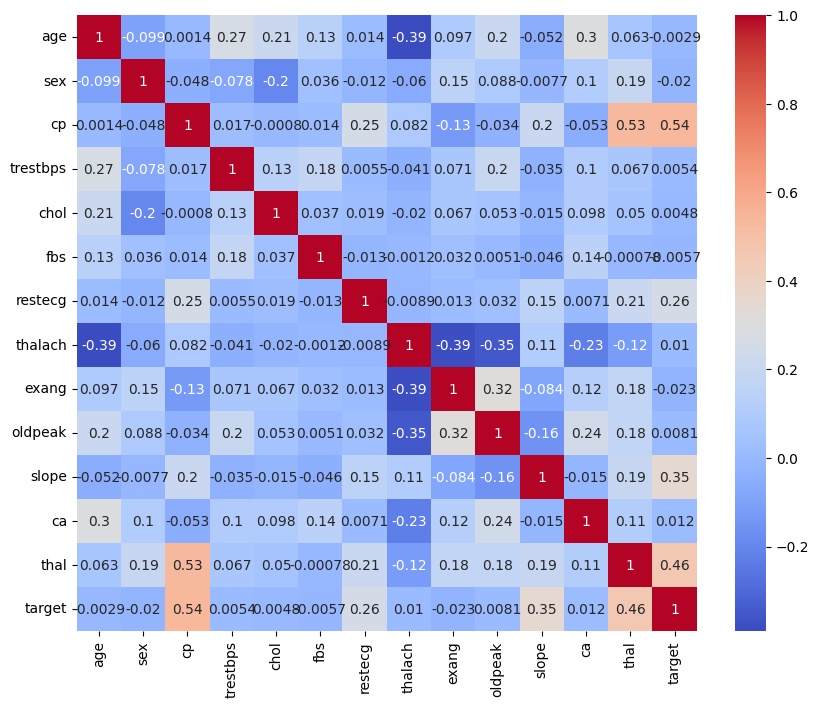

In [118]:
# Histograms for numerical features
df.hist(figsize=(12, 10))
plt.tight_layout()
plt.show()

# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()


# Data cleaning 

In [119]:
# checking for null values
df.isna().sum()

age          79
sex          31
cp          159
trestbps      0
chol         63
fbs          79
restecg       7
thalach       0
exang        47
oldpeak      31
slope        54
ca            0
thal          7
target        0
dtype: int64

In [120]:
# checking for duplicates
df.duplicated().sum()

458

In [121]:
# checking each duplicated rows
df[df.duplicated()]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
312,34.0,0.0,1.0,118.0,210.0,0.0,1.0,192.0,0.0,0.7,2.0,0.0,2.0,1
340,46.0,1.0,0.0,120.0,249.0,0.0,0.0,144.0,0.0,0.8,2.0,0.0,3.0,0
358,66.0,0.0,2.0,146.0,278.0,0.0,0.0,152.0,0.0,0.0,1.0,1.0,2.0,1
361,29.0,1.0,1.0,130.0,204.0,0.0,0.0,202.0,0.0,0.0,2.0,0.0,2.0,1
381,37.0,0.0,2.0,120.0,215.0,0.0,1.0,170.0,0.0,0.0,2.0,0.0,2.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1432,55.0,0.0,4.0,180.0,327.0,0.0,1.0,117.0,1.0,3.4,2.0,0.0,3.0,2
1451,60.0,1.0,4.0,117.0,230.0,1.0,0.0,160.0,1.0,1.4,1.0,2.0,7.0,2
1453,66.0,1.0,4.0,112.0,212.0,0.0,2.0,132.0,1.0,0.1,1.0,1.0,3.0,2
1497,62.0,0.0,4.0,138.0,294.0,1.0,0.0,106.0,0.0,1.9,2.0,3.0,3.0,2


In [122]:
# drop duplicated rows
df = df.drop_duplicates()

In [123]:
df.shape

(1134, 14)

# Observation
- We have null values in sex, cp, fbs, restecg, thalach, exang, slope and thal columns
- We also have 461 duplicated rows

In [124]:
# Identifying numerical and categorical columns
numerical_cols = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
categorical_cols = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']

In [125]:
# Imputers
numerical_imputer = SimpleImputer(strategy='median')
categorical_imputer = SimpleImputer(strategy='most_frequent')


In [150]:
df['target'].unique()

array([0, 2, 1, 3, 4])

In [126]:

# Scaling and Encoding
scaler = StandardScaler()
ohe = OneHotEncoder(handle_unknown='ignore')

In [127]:

# Applying transformations
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_imputer, numerical_cols),
        ('scale', scaler, numerical_cols),
        ('cat', categorical_imputer, categorical_cols),
        ('ohe', ohe, categorical_cols)
    ])


In [128]:

# Fit the preprocessor
df[numerical_cols] = numerical_imputer.fit_transform(df[numerical_cols])


# Scaling numerical columns
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

# Correctly initializing OneHotEncoder
encoder = OneHotEncoder()

# Fitting and transforming the categorical columns
encoded_categorical_data = encoder.fit_transform(df[categorical_cols])


In [129]:
# Converting to a dense DataFrame
encoded_categorical_df = pd.DataFrame(encoded_categorical_data.toarray(), columns=encoder.get_feature_names_out(categorical_cols))

encoded_categorical_df.head()


,sex_0.0,sex_1.0,sex_nan,cp_0.0,cp_1.0,cp_2.0,cp_3.0,cp_4.0,cp_nan,fbs_0.0,...,ca_2.0,ca_3.0,ca_4.0,thal_0.0,thal_1.0,thal_2.0,thal_3.0,thal_6.0,thal_7.0,thal_nan
0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [130]:
# After handling missing values, scaling numerical features, and encoding categorical features,
# the numerical features are already updated in the df DataFrame.

# For demonstration purposes, we'll concatenate the original numerical columns (now cleaned and scaled)
# with the one-hot encoded categorical DataFrame to view the fully preprocessed dataset.

# Concatenating the numerical and encoded categorical dataframes
new_df = pd.concat([df[numerical_cols].reset_index(drop=True), encoded_categorical_df.reset_index(drop=True)], axis=1)

# Display the first few rows of the fully preprocessed (cleaned) DataFrame
new_df.head()


,age,trestbps,chol,thalach,oldpeak,sex_0.0,sex_1.0,sex_nan,cp_0.0,cp_1.0,...,ca_2.0,ca_3.0,ca_4.0,thal_0.0,thal_1.0,thal_2.0,thal_3.0,thal_6.0,thal_7.0,thal_nan
0,0.981107,0.750819,-0.273819,0.005347,1.067309,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,1.438769,1.591875,0.787928,-1.839956,-0.223846,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,1.438769,-0.650941,-0.353951,-0.917305,1.325540,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,-1.993694,-0.090237,0.066741,1.630971,2.100233,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,-1.536032,-0.090237,-0.854775,0.971934,0.292616,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


# MODELLING

In [131]:

# First, ensuring 'target' is included for completeness
new_df = pd.concat([new_df, df['target'].reset_index(drop=True)], axis=1)


In [132]:

# Separating features and target variable
X = new_df.drop('target', axis=1)
y = new_df['target']


In [133]:
# To check if the target variable is balanced
target = new_df['target'].value_counts().rename('total').reset_index()

In [134]:
target['ratio'] = target['total'].apply(lambda x: round(x/target['total'].sum(),2)) 
target

,target,total,ratio
0,1,512,0.45
1,0,431,0.38
2,2,143,0.13
3,3,35,0.03
4,4,13,0.01


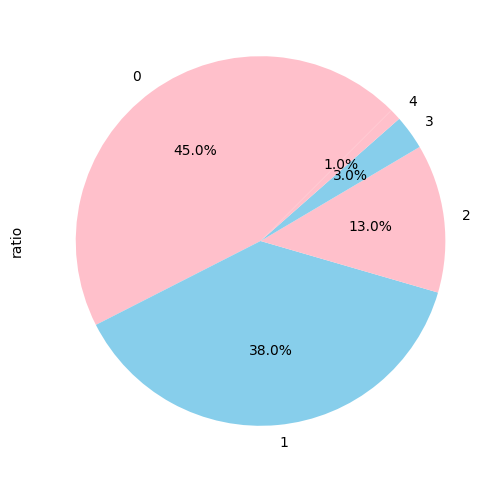

In [135]:
plt.figure(figsize = (10,6))
target['ratio'].plot.pie(startangle = 45, colors = ['pink', 'skyblue'], autopct = '%.1f%%')
plt.show()

In [136]:

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Confirming the shapes of the splits
X_train.shape, X_test.shape, y_train.shape, y_test.shape


((907, 41), (227, 41), (907,), (227,))

In [137]:
X_test.head()

,age,trestbps,chol,thalach,oldpeak,sex_0.0,sex_1.0,sex_nan,cp_0.0,cp_1.0,...,ca_2.0,ca_3.0,ca_4.0,thal_0.0,thal_1.0,thal_2.0,thal_3.0,thal_6.0,thal_7.0,thal_nan
784,0.294615,1.031171,0.587599,-1.664213,-0.396000,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
900,-0.391878,-0.650941,0.968225,0.312897,-0.396000,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
413,1.324354,-0.650941,1.108456,0.049282,-0.568154,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
467,0.065784,-0.090237,-0.514215,0.576512,-0.912461,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
746,0.294615,-0.426659,0.287104,-0.390075,-0.654231,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [138]:
y_train.head()

12     2
381    1
717    1
497    0
966    1
Name: target, dtype: int64

In [139]:
y_train.unique()

array([2, 1, 0, 3, 4])

# **Logistic Regression**

In [140]:

# Initializing the Logistic Regression model
log_reg = LogisticRegression(max_iter=1000, random_state=42)

# Fitting the model on the training data
log_reg.fit(X_train, y_train)

# Predicting on the testing data
y_pred = log_reg.predict(X_test)

# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Logistic regression Accuracy: {accuracy:.4f}\n {class_report}")


Logistic regression Accuracy: 0.6652
               precision    recall  f1-score   support

           0       0.71      0.66      0.69        94
           1       0.69      0.72      0.70        99
           2       0.53      0.74      0.62        23
           3       0.20      0.10      0.13        10
           4       0.00      0.00      0.00         1

    accuracy                           0.67       227
   macro avg       0.43      0.44      0.43       227
weighted avg       0.66      0.67      0.66       227



/Users/user/Desktop/Cardiovascular-Disease-Prediction_-Report/venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/user/Desktop/Cardiovascular-Disease-Prediction_-Report/venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/user/Desktop/Cardiovascular-Disease-Prediction_-Report/venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_

# **SVC and LinearSVC**

In [141]:

# Initializing the Support Vector Machine models
svm_clf = SVC(kernel='rbf', random_state=42)
linear_svc_clf = LinearSVC(max_iter=10000, random_state=42)

# Fitting the SVM model
svm_clf.fit(X_train, y_train)
# Predicting on the testing data with SVM
y_pred_svm = svm_clf.predict(X_test)

# Fitting the LinearSVC model
linear_svc_clf.fit(X_train, y_train)
# Predicting on the testing data with LinearSVC
y_pred_linear_svc = linear_svc_clf.predict(X_test)

# Evaluating the models
accuracy_svm = accuracy_score(y_test, y_pred_svm)
accuracy_linear_svc = accuracy_score(y_test, y_pred_linear_svc)
svc_conf_matrix = confusion_matrix(y_test, y_pred_linear_svc)
svm_class_report = classification_report(y_test, y_pred_svm)
linear_svc_class_report = classification_report(y_test, y_pred_linear_svc)

accuracy_svm, accuracy_linear_svc

print(f"SVC Accuracy: {accuracy_svm:.4f}\nLinear SVC Accuracy: {accuracy_linear_svc:.4f}")
print(f"SVC : {svm_class_report}\nLinear SVC: {linear_svc_class_report}")

SVC Accuracy: 0.6740
Linear SVC Accuracy: 0.6784
SVC :               precision    recall  f1-score   support

           0       0.79      0.62      0.69        94
           1       0.66      0.77      0.71        99
           2       0.50      0.83      0.62        23
           3       0.00      0.00      0.00        10
           4       0.00      0.00      0.00         1

    accuracy                           0.67       227
   macro avg       0.39      0.44      0.40       227
weighted avg       0.67      0.67      0.66       227

Linear SVC:               precision    recall  f1-score   support

           0       0.71      0.67      0.69        94
           1       0.70      0.73      0.71        99
           2       0.56      0.83      0.67        23
           3       0.00      0.00      0.00        10
           4       0.00      0.00      0.00         1

    accuracy                           0.68       227
   macro avg       0.39      0.44      0.41       227
weighted a

/Users/user/Desktop/Cardiovascular-Disease-Prediction_-Report/venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/user/Desktop/Cardiovascular-Disease-Prediction_-Report/venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/user/Desktop/Cardiovascular-Disease-Prediction_-Report/venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_

# **KNeighborsClassifier**

In [142]:


# Initialize the KNN model
knn_clf = KNeighborsClassifier(n_neighbors=5)

# Fit the model
knn_clf.fit(X_train, y_train)

# Make predictions
y_pred_knn = knn_clf.predict(X_test)

# Evaluate the model
accuracy_knn = accuracy_score(y_test, y_pred_knn)
knn_conf_matrix = confusion_matrix(y_test, y_pred_knn)
knn_class_report = classification_report(y_test, y_pred_knn)
print(f"KNN Model Accuracy: {accuracy_knn:.4f}\n {knn_class_report}")


KNN Model Accuracy: 0.5947
               precision    recall  f1-score   support

           0       0.62      0.74      0.68        94
           1       0.65      0.56      0.60        99
           2       0.37      0.43      0.40        23
           3       0.00      0.00      0.00        10
           4       0.00      0.00      0.00         1

    accuracy                           0.59       227
   macro avg       0.33      0.35      0.33       227
weighted avg       0.58      0.59      0.58       227



/Users/user/Desktop/Cardiovascular-Disease-Prediction_-Report/venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/user/Desktop/Cardiovascular-Disease-Prediction_-Report/venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/user/Desktop/Cardiovascular-Disease-Prediction_-Report/venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_

# **SGDClassifier**

In [143]:
# Initializing the Stochastic Gradient Descent Classifier
sgd_clf = SGDClassifier(max_iter=1000, tol=1e-3, random_state=42)

# Fitting the model on the training data
sgd_clf.fit(X_train, y_train)

# Predicting on the testing data with SGD
y_pred_sgd = sgd_clf.predict(X_test)

# Evaluating the SGD model
accuracy_sgd = accuracy_score(y_test, y_pred_sgd)
sgd_conf_matrix = confusion_matrix(y_test, y_pred_sgd)
sgd_class_report = classification_report(y_test, y_pred_sgd)

print(f"SGD Model Accuracy: {accuracy_sgd:.4f}\n {sgd_class_report}")


SGD Model Accuracy: 0.5727
               precision    recall  f1-score   support

           0       0.55      0.85      0.67        94
           1       0.73      0.46      0.57        99
           2       0.38      0.13      0.19        23
           3       0.09      0.10      0.10        10
           4       0.00      0.00      0.00         1

    accuracy                           0.57       227
   macro avg       0.35      0.31      0.31       227
weighted avg       0.59      0.57      0.55       227



/Users/user/Desktop/Cardiovascular-Disease-Prediction_-Report/venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/user/Desktop/Cardiovascular-Disease-Prediction_-Report/venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/user/Desktop/Cardiovascular-Disease-Prediction_-Report/venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_

# **GradientBoostingClassifier**

In [144]:

# Initializing the Gradient Boosting Classifier
gb_clf = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

# Fitting the model on the training data
gb_clf.fit(X_train, y_train)

# Predicting on the testing data with Gradient Boosting
y_pred_gb = gb_clf.predict(X_test)

# Evaluating the Gradient Boosting model
accuracy_gb = accuracy_score(y_test, y_pred_gb)
gb_conf_matrix = confusion_matrix(y_test, y_pred_gb)
gb_class_report = classification_report(y_test, y_pred_gb)
print(f"GB Model Accuracy: {accuracy_gb:.4f}\n {gb_class_report}")

GB Model Accuracy: 0.6123
               precision    recall  f1-score   support

           0       0.71      0.69      0.70        94
           1       0.68      0.66      0.67        99
           2       0.30      0.39      0.34        23
           3       0.00      0.00      0.00        10
           4       0.00      0.00      0.00         1

    accuracy                           0.61       227
   macro avg       0.34      0.35      0.34       227
weighted avg       0.62      0.61      0.62       227



# **DecisionTreeClassifier**

In [145]:
# Initializing the Decision Tree Classifier
dt_clf = DecisionTreeClassifier(random_state=42)

# Fitting the model on the training data
dt_clf.fit(X_train, y_train)

# Predicting on the testing data with Decision Tree
y_pred_dt = dt_clf.predict(X_test)

# Evaluating the Decision Tree model
accuracy_dt = accuracy_score(y_test, y_pred_dt)
dt_conf_matrix = confusion_matrix(y_test, y_pred_dt)
dt_class_report = classification_report(y_test, y_pred_dt)
print(f"Dt Model Accuracy: {accuracy_dt:.4f}\n {dt_class_report}")


Dt Model Accuracy: 0.5639
               precision    recall  f1-score   support

           0       0.67      0.65      0.66        94
           1       0.60      0.59      0.59        99
           2       0.30      0.35      0.32        23
           3       0.12      0.10      0.11        10
           4       0.00      0.00      0.00         1

    accuracy                           0.56       227
   macro avg       0.34      0.34      0.34       227
weighted avg       0.57      0.56      0.57       227



# **RandomForestClassifier**

In [146]:

# Initializing the Random Forest Classifier
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)

# Fitting the model on the training data
rf_clf.fit(X_train, y_train)

# Predicting on the testing data with Random Forest
y_pred_rf = rf_clf.predict(X_test)

# Evaluating the Random Forest model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
rf_conf_matrix = confusion_matrix(y_test, y_pred_rf)
rf_class_report = classification_report(y_test, y_pred_rf)
print(f"RF Model Accuracy: {accuracy_rf:.4f}\n {rf_class_report}")


RF Model Accuracy: 0.5727
               precision    recall  f1-score   support

           0       0.66      0.68      0.67        94
           1       0.63      0.57      0.60        99
           2       0.31      0.43      0.36        23
           3       0.00      0.00      0.00        10
           4       0.00      0.00      0.00         1

    accuracy                           0.57       227
   macro avg       0.32      0.34      0.33       227
weighted avg       0.58      0.57      0.57       227



# **XGBClassifier**

In [147]:

# Initializing the XGB Classifier
xgb_clf = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

# Fitting the model on the training data
xgb_clf.fit(X_train, y_train)

# Predicting on the testing data with XGB Classifier
y_pred_xgb = xgb_clf.predict(X_test)

# Evaluating the XGB Classifier model
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
xgb_conf_matrix = confusion_matrix(y_test, y_pred_xgb)
xgb_class_report = classification_report(y_test, y_pred_xgb)
print(f"XGB Model Accuracy: {accuracy_xgb:.4f}\n {xgb_class_report}")


XGB Model Accuracy: 0.5859
               precision    recall  f1-score   support

           0       0.70      0.66      0.68        94
           1       0.64      0.63      0.63        99
           2       0.31      0.39      0.35        23
           3       0.00      0.00      0.00        10
           4       0.00      0.00      0.00         1

    accuracy                           0.59       227
   macro avg       0.33      0.34      0.33       227
weighted avg       0.60      0.59      0.59       227



## CONCLUSION AND RECOMMENDATION
- Due to our machine learning models, we discovered both logistic Regressor, Svc and Linear Svc  had the highest percentage of 66% amidst other predictive models. although our result is based on our target variable been imbalance and we therefore make our decisions with the weighted average f1-score.